In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/precog/data/All_States_GE.csv')

<ipython-input-3-aa7087c45eb5>:1: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/precog/data/All_States_GE.csv')


In [4]:
df.shape

(91669, 45)

In [5]:
# df_2014 = df[df['Year']==2014]
df_2014 = df[df['Assembly_No']==16]

In [6]:
df_2014.shape

(9090, 45)

In [7]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 8710 to 17799
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_Name              9090 non-null   object 
 1   Assembly_No             9090 non-null   int64  
 2   Constituency_No         9090 non-null   int64  
 3   Year                    9090 non-null   int64  
 4   month                   8794 non-null   float64
 5   Poll_No                 9090 non-null   int64  
 6   DelimID                 9090 non-null   int64  
 7   Position                9090 non-null   int64  
 8   Candidate               9090 non-null   object 
 9   Sex                     8853 non-null   object 
 10  Party                   9078 non-null   object 
 11  Votes                   9090 non-null   float64
 12  Candidate_Type          8284 non-null   object 
 13  Valid_Votes             9090 non-null   int64  
 14  Electors                9090 non-nul

In [8]:
df_2014.describe()

,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Votes,Valid_Votes,Electors,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Margin,Margin_Percentage,ENOP,Party_ID,Contested,Last_Party_ID,No_Terms
count,9090.0,9090.000000,9090.000000,8794.0,9090.000000,9090.0,9090.000000,9090.000000,9.090000e+03,9.090000e+03,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000,8970.000000,8535.000000,1571.000000,8535.000000
mean,16.0,19.498790,2014.084268,4.0,0.032563,4.0,9.710341,63929.201650,1.030383e+06,1.574272e+06,17.438064,66.278273,6.292631,30243.173707,2.969880,2.948304,8390.767559,1.394845,7892.868873,0.216755
std,0.0,17.020851,0.541739,0.0,0.177500,0.0,6.713297,142876.431622,1.727854e+05,2.669482e+05,7.101062,10.181607,13.752228,79863.086163,7.701392,0.634907,4867.916849,1.153620,4915.141060,0.792439
min,16.0,1.000000,2014.000000,4.0,0.000000,4.0,1.000000,105.000000,4.323900e+04,4.992200e+04,2.000000,5.980000,0.010000,0.000000,0.000000,1.640000,5.000000,1.000000,9.000000,0.000000
25%,16.0,7.000000,2014.000000,4.0,0.000000,4.0,4.000000,1778.250000,9.488870e+05,1.442206e+06,13.000000,58.680000,0.180000,101.000000,0.010000,2.440000,3880.250000,1.000000,3482.000000,0.000000
50%,16.0,15.000000,2014.000000,4.0,0.000000,4.0,9.000000,4536.500000,1.034108e+06,1.576667e+06,15.000000,65.975000,0.450000,537.500000,0.050000,2.860000,10809.000000,1.000000,9677.000000,0.000000
75%,16.0,28.000000,2014.000000,4.0,0.000000,4.0,13.000000,15621.750000,1.127965e+06,1.719984e+06,22.000000,74.280000,1.600000,4513.750000,0.460000,3.330000,10809.000000,1.000000,10809.000000,0.000000
max,16.0,80.000000,2018.000000,4.0,1.000000,4.0,43.000000,922416.000000,1.620444e+06,3.183083e+06,42.000000,88.350000,75.790000,696321.000000,56.250000,5.260000,18721.000000,13.000000,18721.000000,10.000000


## Data Cleaning

In [9]:
df_2014['State_Name'].nunique()

35

In [10]:
df_2014['State_Name'].value_counts()

Uttar_Pradesh                1426
Maharashtra                   984
Tamil_Nadu                    884
Andhra_Pradesh                677
Bihar                         655
West_Bengal                   552
Karnataka                     482
Madhya_Pradesh                432
Rajasthan                     381
Gujarat                       364
Kerala                        298
Punjab                        269
Jharkhand                     254
Haryana                       240
Odisha                        224
Chhattisgarh                  222
Assam                         181
Delhi                         157
Jammu_&_Kashmir                85
Uttarakhand                    79
Himachal_Pradesh               42
Puducherry                     31
Tripura                        27
Goa                            21
Manipur                        20
Chandigarh                     18
Andaman_&_Nicobar_Islands      16
Meghalaya                      14
Arunachal_Pradesh              13
Dadra_&_Nagar_

In [11]:
df_2014.columns

Index(['State_Name', 'Assembly_No', 'Constituency_No', 'Year', 'month',
       'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party', 'Votes',
       'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'Sub_Region', 'N_Cand', 'Turnout_Percentage',
       'Vote_Share_Percentage', 'Deposit_Lost', 'Margin', 'Margin_Percentage',
       'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID', 'last_poll', 'Contested',
       'Last_Party', 'Last_Party_ID', 'Last_Constituency_Name',
       'Same_Constituency', 'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent',
       'Recontest', 'MyNeta_education', 'TCPD_Prof_Main',
       'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc',
       'Election_Type'],
      dtype='object')

In [12]:
df_2014['last_poll'].value_counts()

True     8681
False     409
Name: last_poll, dtype: int64

In [13]:
df_2014['Year'].astype(np.int64)

8710     2014
8711     2014
8712     2014
8713     2014
8714     2014
         ... 
17795    2018
17796    2018
17797    2018
17798    2018
17799    2018
Name: Year, Length: 9090, dtype: int64

In [14]:
bool_cols = ['Deposit_Lost', 'Turncoat', 'Incumbent', 'Same_Party', 'Same_Constituency', 'Recontest']
for col in bool_cols:
    df_2014[col] = df_2014[col].replace({'yes': 1, 'no': 0}).astype(np.float64)

df_2014['last_poll'] = df_2014['last_poll'].replace({True: 1, False: 0}).astype(np.float64)



<ipython-input-14-0ee00673e8d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014[col] = df_2014[col].replace({'yes': 1, 'no': 0}).astype(np.float64)
<ipython-input-14-0ee00673e8d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['last_poll'] = df_2014['last_poll'].replace({True: 1, False: 0}).astype(np.float64)


In [15]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 8710 to 17799
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_Name              9090 non-null   object 
 1   Assembly_No             9090 non-null   int64  
 2   Constituency_No         9090 non-null   int64  
 3   Year                    9090 non-null   int64  
 4   month                   8794 non-null   float64
 5   Poll_No                 9090 non-null   int64  
 6   DelimID                 9090 non-null   int64  
 7   Position                9090 non-null   int64  
 8   Candidate               9090 non-null   object 
 9   Sex                     8853 non-null   object 
 10  Party                   9078 non-null   object 
 11  Votes                   9090 non-null   float64
 12  Candidate_Type          8284 non-null   object 
 13  Valid_Votes             9090 non-null   int64  
 14  Electors                9090 non-nul

In [16]:
df_2014['Election_Type'].value_counts()

Lok Sabha Election (GE)    9090
Name: Election_Type, dtype: int64

In [17]:
sameval_cols = ['month', 'Assembly_No', 'DelimID' ]
df_2014.drop(columns = sameval_cols, axis=1, inplace=True)

<ipython-input-17-05a85fdae8cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014.drop(columns = sameval_cols, axis=1, inplace=True)


In [18]:
df_2014.drop(columns = ['Election_Type', 'Party_ID'], axis=1, inplace=True)

<ipython-input-18-60596824df8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014.drop(columns = ['Election_Type', 'Party_ID'], axis=1, inplace=True)


In [19]:
for col in df_2014.columns:
    if(df_2014[col].isnull().sum()!=0):print(f'{col}: {df_2014[col].isnull().sum()}')

Sex: 237
Party: 12
Candidate_Type: 806
Sub_Region: 7664
Deposit_Lost: 555
pid: 555
Party_Type_TCPD: 148
Contested: 555
Last_Party: 7519
Last_Party_ID: 7519
Last_Constituency_Name: 7519
Same_Constituency: 7519
Same_Party: 7519
No_Terms: 555
Turncoat: 555
Incumbent: 555
Recontest: 555
MyNeta_education: 1136
TCPD_Prof_Main: 1039
TCPD_Prof_Main_Desc: 6002
TCPD_Prof_Second: 7877
TCPD_Prof_Second_Desc: 8756


In [20]:
df_2014['Candidate'].value_counts()

None of the Above        543
NOTA                      12
ANIL KUMAR                11
ASHOK KUMAR               10
VIJAY KUMAR                9
                        ... 
MARUTI RAMAPPA HANASI      1
GANGADHAR S. BADIGER       1
VIKAS B. SOPPIN            1
SANJAY KOTHARI             1
Amal Barman                1
Name: Candidate, Length: 8240, dtype: int64

In [21]:
# Replace 'None of the Above' with 'NOTA' in the 'Candidate' column
df_2014['Candidate'] = df_2014['Candidate'].replace('None of the Above', 'NOTA')
df_2014['Candidate_Type'] = df_2014['Candidate_Type'].replace('Gen', 'GEN')

<ipython-input-21-2cde02edfa44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Candidate'] = df_2014['Candidate'].replace('None of the Above', 'NOTA')
<ipython-input-21-2cde02edfa44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Candidate_Type'] = df_2014['Candidate_Type'].replace('Gen', 'GEN')


In [22]:
NOTA_candidate = ['Deposit_Lost', 'pid', 'Contested', 'No_Terms', 'Turncoat', 'Incumbent', 'Recontest']

for column in NOTA_candidate:
    if df_2014[column].dtype == 'float64' or df_2014[column].dtype == 'int64':
        df_2014[column] = df_2014[column].fillna(-1).astype(np.float64)
    elif df_2014[column].dtype == 'object':
        df_2014[column].fillna('NOTA', inplace=True)


<ipython-input-22-6f85e78e809e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014[column] = df_2014[column].fillna(-1).astype(np.float64)
<ipython-input-22-6f85e78e809e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014[column].fillna('NOTA', inplace=True)


In [23]:
firsttime_candidate = ['Last_Party', 'Last_Party_ID', 'Last_Constituency_Name', 'Same_Constituency', 'Same_Party']

for column in firsttime_candidate:
    if df_2014[column].dtype == 'float64' or df_2014[column].dtype == 'int64':
        df_2014[column] = df_2014[column].fillna(-1).astype(np.float64)
    elif df_2014[column].dtype == 'object':
        df_2014[column].fillna('NA', inplace=True)
df_2014['Sub_Region'].fillna('NA', inplace=True)

<ipython-input-23-d9224ff1f37c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014[column].fillna('NA', inplace=True)
<ipython-input-23-d9224ff1f37c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014[column] = df_2014[column].fillna(-1).astype(np.float64)
<ipython-input-23-d9224ff1f37c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Sub_Region'].fillna('NA

In [24]:
# Drop rows where 'Party' column is null
df_2014.dropna(subset=['Party'], inplace=True)

<ipython-input-24-e4197e67ca93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014.dropna(subset=['Party'], inplace=True)


In [25]:
for col in df_2014.columns:
    if(df_2014[col].isnull().sum()!=0):print(f'{col}: {df_2014[col].isnull().sum()}')

Sex: 225
Candidate_Type: 794
Party_Type_TCPD: 136
MyNeta_education: 1124
TCPD_Prof_Main: 1027
TCPD_Prof_Main_Desc: 5990
TCPD_Prof_Second: 7865
TCPD_Prof_Second_Desc: 8744


In [26]:
TCPD_cols = ['TCPD_Prof_Main', 'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc']

for column in TCPD_cols:
    df_2014[column].fillna('unspecified', inplace=True)

<ipython-input-26-c8a2022faf61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014[column].fillna('unspecified', inplace=True)


#### Categorical

In [27]:
categorical_columns_to_fill = ['Sex', 'Candidate_Type', 'Party_Type_TCPD', 'MyNeta_education']

# Fill missing values with mode for each column
for column in categorical_columns_to_fill:
    mode_value = df_2014[column].mode()[0]
    df_2014[column].fillna(mode_value, inplace=True)


<ipython-input-27-4a9670c7c7a3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014[column].fillna(mode_value, inplace=True)
<ipython-input-27-4a9670c7c7a3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014[column].fillna(mode_value, inplace=True)
<ipython-input-27-4a9670c7c7a3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014[column].fillna(mode_value, inplace=True)
<ipython-input-27-4a9670c7c7a3>:6: SettingWithCop

In [28]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9078 entries, 8710 to 17799
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_Name              9078 non-null   object 
 1   Constituency_No         9078 non-null   int64  
 2   Year                    9078 non-null   int64  
 3   Poll_No                 9078 non-null   int64  
 4   Position                9078 non-null   int64  
 5   Candidate               9078 non-null   object 
 6   Sex                     9078 non-null   object 
 7   Party                   9078 non-null   object 
 8   Votes                   9078 non-null   float64
 9   Candidate_Type          9078 non-null   object 
 10  Valid_Votes             9078 non-null   int64  
 11  Electors                9078 non-null   float64
 12  Constituency_Name       9078 non-null   object 
 13  Constituency_Type       9078 non-null   object 
 14  Sub_Region              9078 non-nul

In [29]:
# df_2014[df_2014['Sub_Region'].isnull()]['State_Name'].value_counts()

In [30]:
df_2014['Deposit_Lost'].value_counts()

 1.0    7229
 0.0    1306
-1.0     543
Name: Deposit_Lost, dtype: int64

## Data Visualization

In [31]:
df_2014['Sex'].value_counts()

M       7856
F        673
NOTA     543
O          6
Name: Sex, dtype: int64

In [32]:
# Filter the DataFrame to include only candidates who won (Position 1)
df_winners = df_2014[df_2014['Position'] == 1]

# Get the count of candidates from each party who secured the first position, differentiated by Candidate_Type
winners_count = df_winners.groupby(['Sex']).size().reset_index(name='Count')
winners_count


,Sex,Count
0,F,66
1,M,506


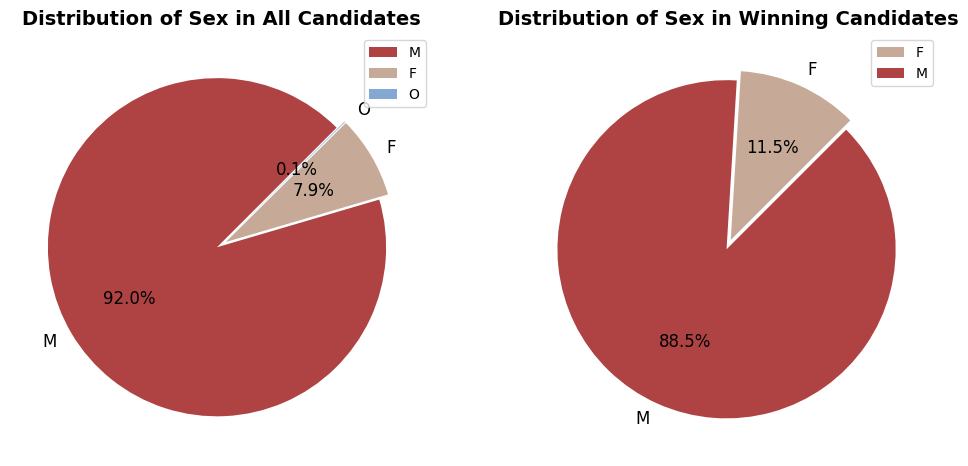

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Labels and values for the first pie chart (Distribution of Sex in Candidates)
labels_1 = ["M", "F", "O"]
values_1 = df_2014[df_2014['Sex']!='NOTA']['Sex'].value_counts()

# Colors for the first pie chart
colors_1 = ['#AF4343', '#C6AA97', '#84A7D3']

# Plot the first pie chart
ax[0].pie(x=values_1, labels=labels_1, autopct="%1.1f%%", startangle=45, explode=[0.03, 0.03, 0.03],
          colors=colors_1, textprops={'fontsize': 12, 'color': 'black'})

# Set title and formatting for the first pie chart
ax[0].set_title("Distribution of Sex in All Candidates", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax[0].set_facecolor('#F0F0F0')
ax[0].legend(labels_1, loc='best')

# Labels and values for the second pie chart (Sex distribution of candidates who won)
labels_2 = winners_count['Sex']
values_2 = winners_count['Count']

# Colors for the second pie chart
colors_2 = ['#C6AA97', '#AF4343']

# Plot the second pie chart
ax[1].pie(x=values_2, labels=labels_2, autopct="%1.1f%%", startangle=45, explode=[0.03, 0.03],
          colors=colors_2, textprops={'fontsize': 12, 'color': 'black'})

# Set title and formatting for the second pie chart
ax[1].set_title("Distribution of Sex in Winning Candidates", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax[1].set_facecolor('#F0F0F0')
ax[1].legend(labels_2, loc='best')

# Show the plot
plt.show()


In [34]:
df_2014['Candidate_Type'].value_counts()

GEN    6340
SC     2112
ST      626
Name: Candidate_Type, dtype: int64

In [35]:
# Filter the DataFrame to include only candidates who won (Position 1)
df_winners = df_2014[df_2014['Position'] == 1]

# Get the count of candidates from each party who secured the first position, differentiated by Candidate_Type
winners_count = df_winners.groupby(['Candidate_Type']).size().reset_index(name='Count')
winners_count


,Candidate_Type,Count
0,GEN,430
1,SC,87
2,ST,55


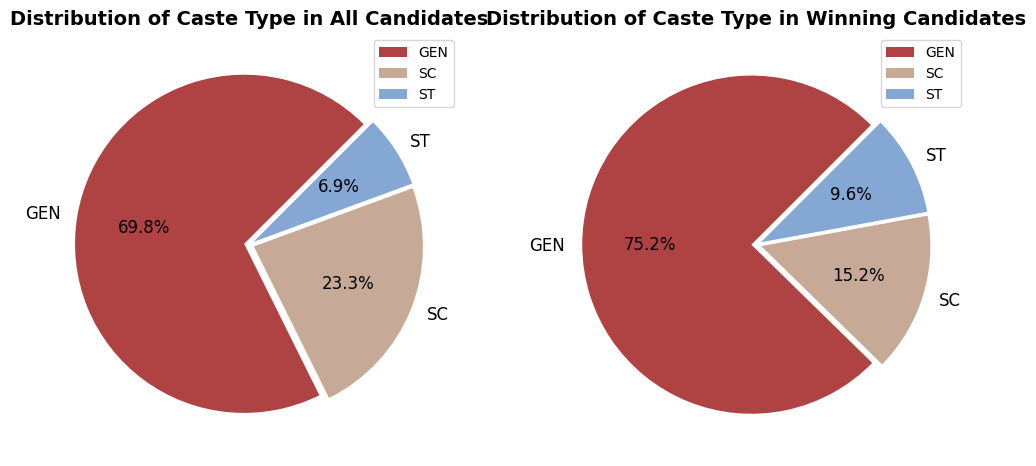

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Labels and values for the first pie chart (Distribution of Sex in Candidates)
labels_1 = ["GEN", "SC", "ST"]
values_1 = df_2014['Candidate_Type'].value_counts()

# Colors for the first pie chart
colors_1 = ['#AF4343', '#C6AA97', '#84A7D3']

# Plot the first pie chart
ax[0].pie(x=values_1, labels=labels_1, autopct="%1.1f%%", startangle=45, explode=[0.03, 0.03, 0.03],
          colors=colors_1, textprops={'fontsize': 12, 'color': 'black'})

# Set title and formatting for the first pie chart
ax[0].set_title("Distribution of Caste Type in All Candidates", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax[0].set_facecolor('#F0F0F0')
ax[0].legend(labels_1, loc='best')

labels_2 = winners_count['Candidate_Type']
values_2 = winners_count['Count']

# Colors for the second pie chart
colors_2 = ['#AF4343', '#C6AA97', '#84A7D3']

# Plot the second pie chart
ax[1].pie(x=values_2, labels=labels_2, autopct="%1.1f%%", startangle=45, explode=[0.03, 0.03, 0.03],
          colors=colors_2, textprops={'fontsize': 12, 'color': 'black'})

# Set title and formatting for the second pie chart
ax[1].set_title("Distribution of Caste Type in Winning Candidates", fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax[1].set_facecolor('#F0F0F0')
ax[1].legend(labels_2, loc='best')

# Show the plot
plt.show()



In [37]:
def correlationFunc(cols):
  # Create the correlation matrix
  correlation_matrix = df_2014[cols].corr()
  # Create a heatmap to visualize the correlations
  plt.figure(figsize=(8, 6))
  sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), fmt='.2f', linewidths=0.5)
  plt.title('Correlation Matrix')
  plt.show()


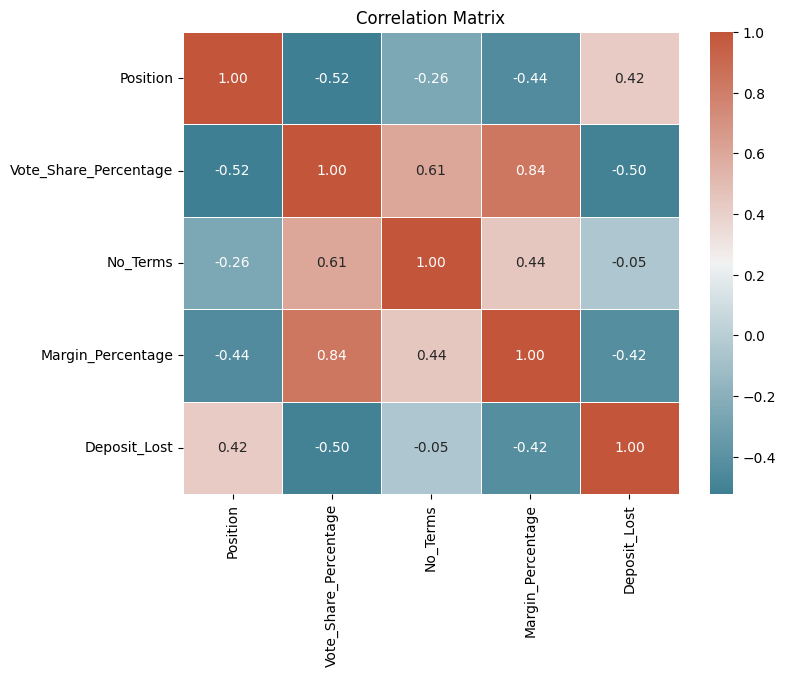

In [38]:
selected_columns = ['Position', 'Vote_Share_Percentage', 'No_Terms' ,'Margin_Percentage', 'Deposit_Lost']
correlationFunc(selected_columns)


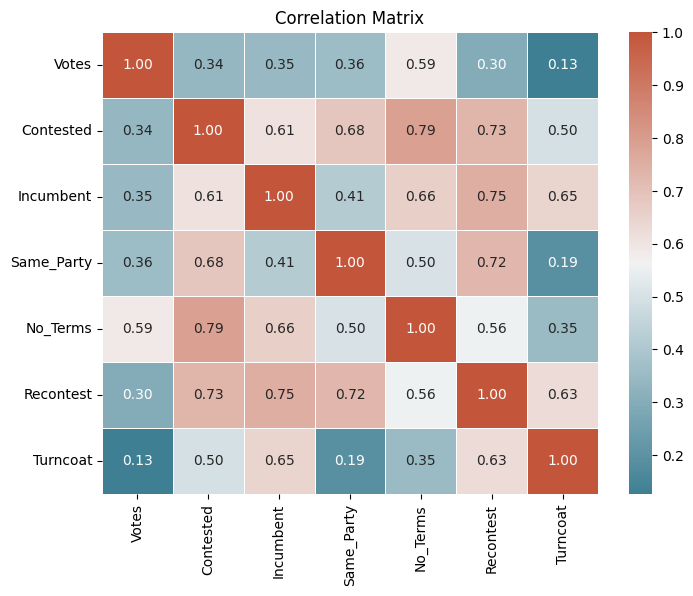

In [39]:
cols = ['Votes', 'Contested' , 'Incumbent', 'Same_Party', 'No_Terms', 'Recontest', 'Turncoat']
correlationFunc(cols)

<Axes: xlabel='Vote_Share_Percentage', ylabel='No_Terms'>

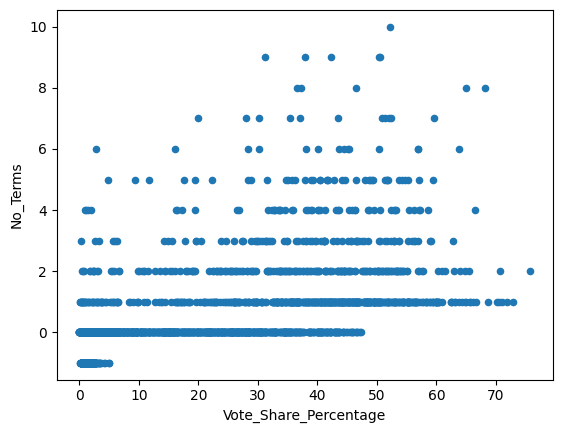

In [40]:
df_2014.plot(kind='scatter', x='Vote_Share_Percentage', y='No_Terms')

<Axes: xlabel='ENOP', ylabel='Margin_Percentage'>

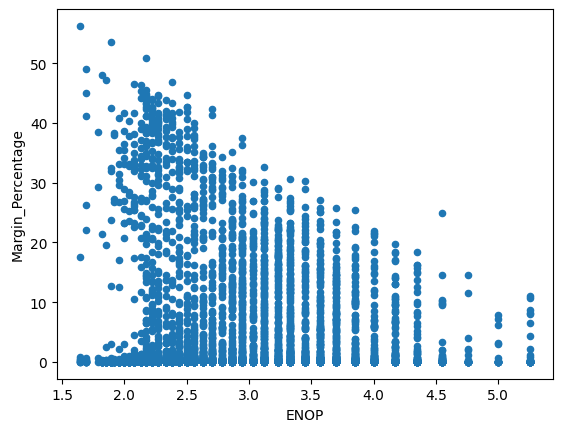

In [41]:
df_2014.plot(kind='scatter', x='ENOP', y='Margin_Percentage')

<ipython-input-42-5c568e60a211>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df_2014['MyNeta_education'].value_counts().values,


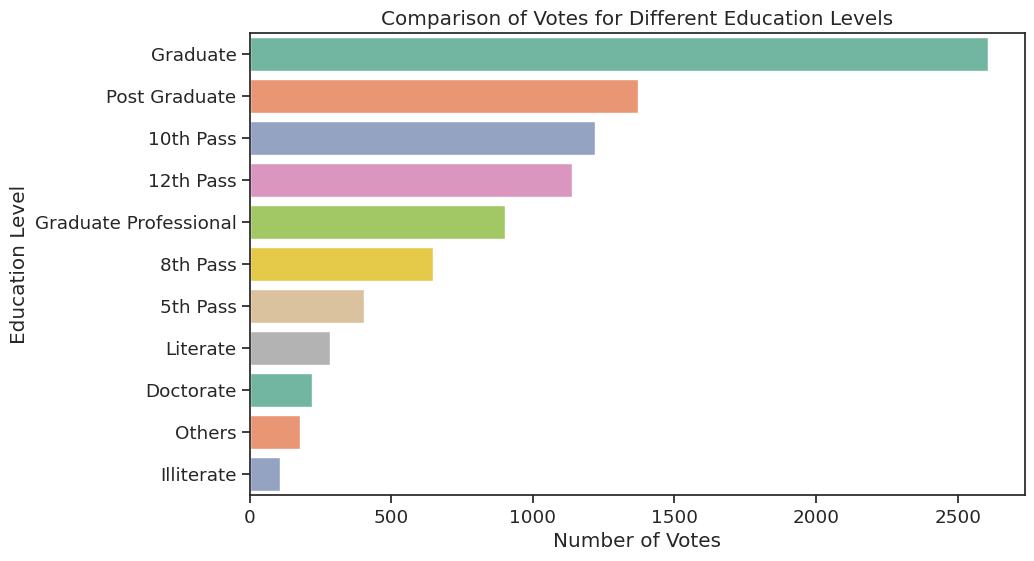

In [42]:
sns.set(style='ticks', font_scale=1.2)

# Create the bar plot
plt.figure(figsize=(10, 6))
# sns.barplot(x='Votes', y='MyNeta_education', data=df_2014, ci=None, palette='Set2')
sns.barplot(x=df_2014['MyNeta_education'].value_counts().values,
            y=df_2014['MyNeta_education'].value_counts().index,
            palette='Set2',  ci=None)
# Set the title and labels
plt.title('Number of Candidates for Different Education Levels')
plt.xlabel('Number of Candidates')
plt.ylabel('Education Level')

# Show the plot
plt.show()


In [43]:
# Filter the DataFrame to include only candidates who won (Position 1)
df_winners = df_2014[df_2014['Position'] == 1]

# Get the count of candidates from each party who secured the first position, differentiated by Candidate_Type
winners_count = df_winners.groupby(['MyNeta_education']).size().reset_index(name='Count')
winners_count

,MyNeta_education,Count
0,10th Pass,48
1,12th Pass,58
2,5th Pass,6
3,8th Pass,9
4,Doctorate,33
5,Graduate,147
6,Graduate Professional,106
7,Illiterate,1
8,Literate,5
9,Others,10


<ipython-input-44-62ba10ad0652>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Count', y='MyNeta_education', data=winners_count_sorted, ci=None, palette='Set2')


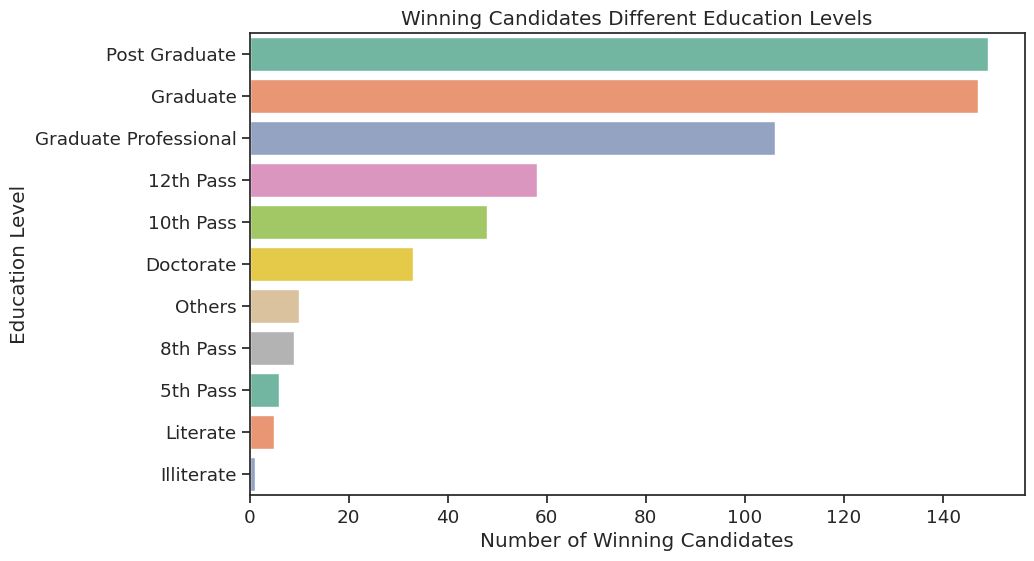

In [44]:
sns.set(style='ticks', font_scale=1.2)
winners_count_sorted = winners_count.sort_values(by='Count', ascending=False)
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='MyNeta_education', data=winners_count_sorted, ci=None, palette='Set2')

# Set the title and labels
plt.title('Winning Candidates Different Education Levels')
plt.xlabel('Number of Winning Candidates')
plt.ylabel('Education Level')

# Show the plot
plt.show()


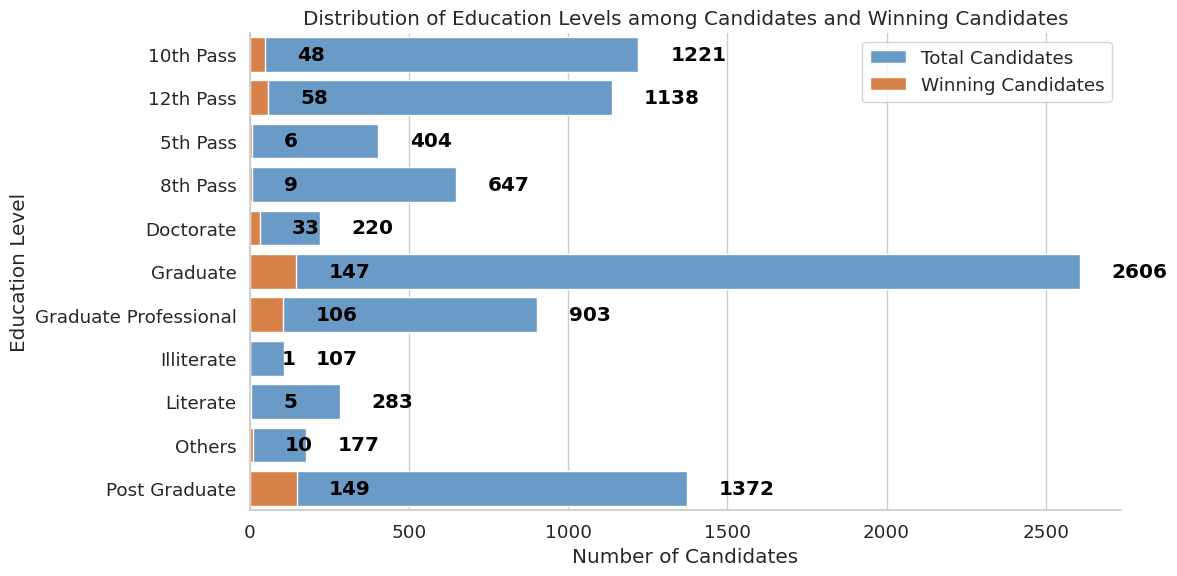

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.2)

# Count of candidates in each education level
education_counts = df_2014['MyNeta_education'].value_counts()

# Filter the DataFrame to include only candidates who won (Position 1)
df_winners = df_2014[df_2014['Position'] == 1]

# Count of winning candidates in each education level
winners_count = df_winners['MyNeta_education'].value_counts()

# Combine the counts into a single DataFrame
education_data = pd.DataFrame({'Total Candidates': education_counts, 'Winning Candidates': winners_count})
education_data.reset_index(inplace=True)
education_data.rename(columns={'index': 'Education Level'}, inplace=True)

# Set the figure size and plot the stacked bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Candidates', y='Education Level', data=education_data, color='#5B9BD5', label='Total Candidates')
sns.barplot(x='Winning Candidates', y='Education Level', data=education_data, color='#ED7D31', label='Winning Candidates')

# Add labels to the bars
for index, value in enumerate(education_data['Total Candidates']):
    plt.text(value + 100, index, f'{value}', va='center', color='black', fontweight='bold')

for index, value in enumerate(education_data['Winning Candidates']):
    plt.text(value + 100, index, f'{value}', va='center', color='black', fontweight='bold')

# Set the title and labels
plt.title('Distribution of Education Levels among Candidates and Winning Candidates')
plt.xlabel('Number of Candidates')
plt.ylabel('Education Level')

# Show the legend
plt.legend()

# Remove unnecessary spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd
import plotly.graph_objects as go

# Count of candidates in each education level
education_counts = df_2014['MyNeta_education'].value_counts()

# Filter the DataFrame to include only candidates who won (Position 1)
df_winners = df_2014[df_2014['Position'] == 1]

# Count of winning candidates in each education level
winners_count = df_winners['MyNeta_education'].value_counts()

# Combine the counts into a single DataFrame
education_data = pd.DataFrame({'Total Candidates': education_counts, 'Winning Candidates': winners_count})
education_data.reset_index(inplace=True)
education_data.rename(columns={'index': 'Education Level'}, inplace=True)

# Create a stacked bar plot using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    y=education_data['Education Level'],
    x=education_data['Total Candidates'],
    name='Total Candidates',
    orientation='h',
    marker=dict(color='#5B9BD5'),
    text=education_data['Total Candidates'],
    textposition='auto',
    hoverinfo='x'
))

fig.add_trace(go.Bar(
    y=education_data['Education Level'],
    x=education_data['Winning Candidates'],
    name='Winning Candidates',
    orientation='h',
    marker=dict(color='#ED7D31'),
    text=education_data['Winning Candidates'],
    textposition='auto',
    hoverinfo='x'
))

# Set the layout
fig.update_layout(
    title='Distribution of Education Levels among Candidates and Winning Candidates',
    xaxis_title='Number of Candidates',
    yaxis_title='Education Level',
    barmode='stack',
    legend=dict(
        x=0.8,
        y=0.05,
        traceorder='normal'
    ),
    margin=dict(l=80, r=20, t=80, b=20),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

# Show the plot
fig.show()


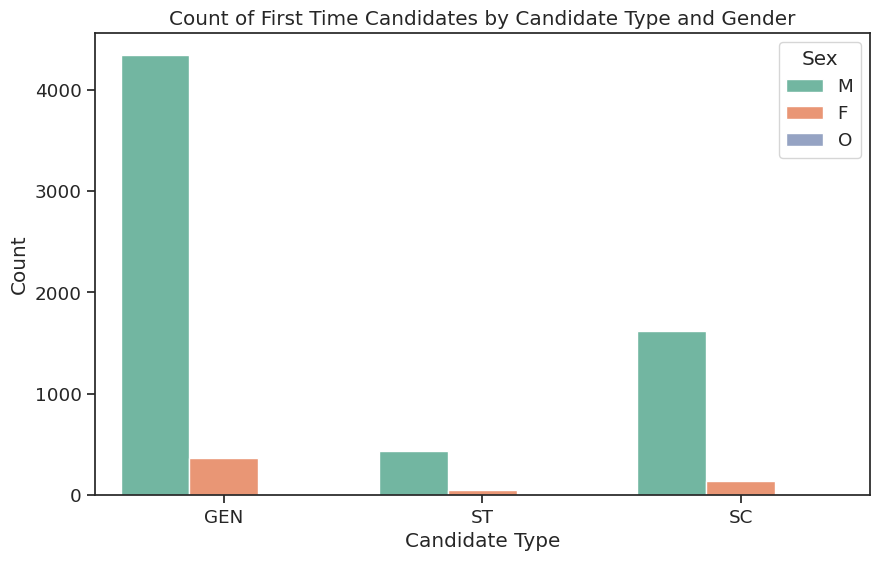

In [47]:
df_cur = df_2014[df_2014['Sex'] != 'NOTA']
df_cur = df_cur[df_cur['Last_Party']=='NA']
sns.set(style='ticks', font_scale=1.2)

plt.figure(figsize=(10, 6))
sns.countplot(x='Candidate_Type', hue='Sex', data=df_cur, palette='Set2')

plt.xlabel('Candidate Type')
plt.ylabel('Count')
plt.title('Count of First Time Candidates by Candidate Type and Gender')

plt.show()

In [48]:
df_cur = df_2014[df_2014['TCPD_Prof_Main']!='unspecified']

<ipython-input-49-6bd65a9350d0>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




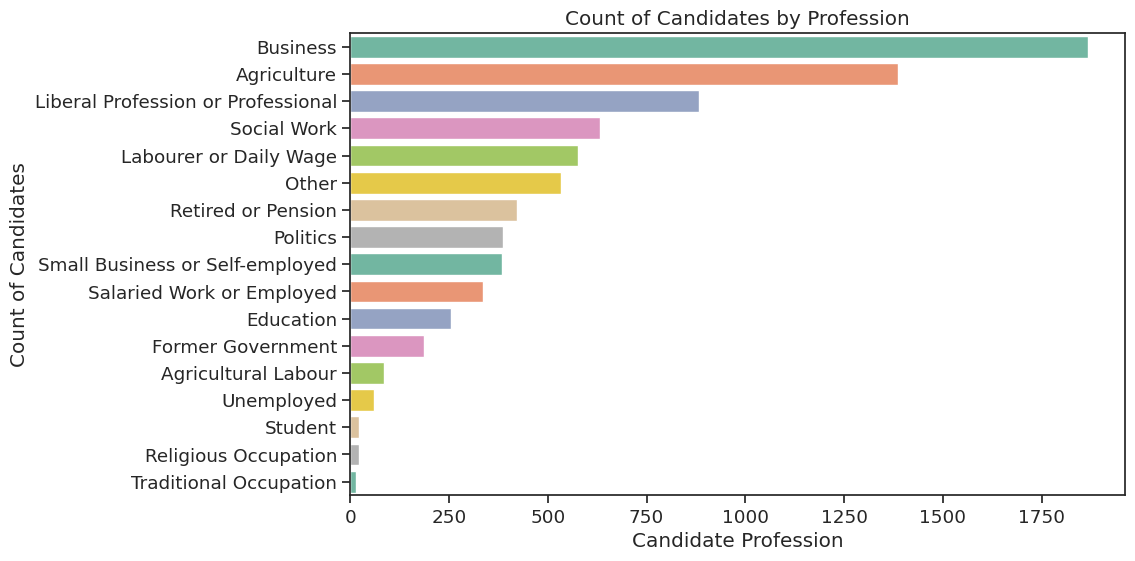

In [49]:
sns.set(style='ticks', font_scale=1.2)

# Create the bar plot to show the count of candidates in each profession
plt.figure(figsize=(10, 6))
sns.barplot(x=df_cur['TCPD_Prof_Main'].value_counts().values,
            y=df_cur['TCPD_Prof_Main'].value_counts().index,
            palette='Set2',  ci=None)

# Set the labels and title
plt.xlabel('Candidate Profession')
plt.ylabel('Count of Candidates')
plt.title('Count of Candidates by Profession')

plt.show()


In [50]:
# Filter the DataFrame to include only candidates who won (Position 1)
df_winners = df_cur[df_cur['Position'] == 1]

# Get the count of candidates from each party who secured the first position, differentiated by Candidate_Type
winners_count = df_winners.groupby(['TCPD_Prof_Main']).size().reset_index(name='Count')
# winners_count

<ipython-input-51-b772b84dbc83>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




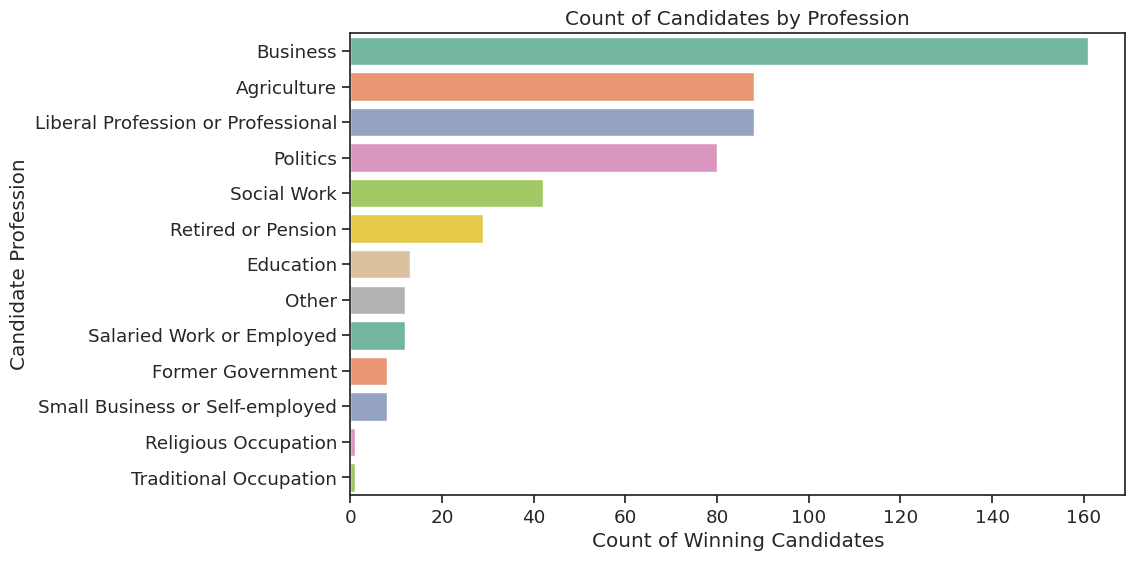

In [51]:
sns.set(style='ticks', font_scale=1.2)
winners_count_sorted = winners_count.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='TCPD_Prof_Main', data=winners_count_sorted, palette='Set2', ci=None)

# Set the labels and title
plt.xlabel('Count of Winning Candidates')
plt.ylabel('Candidate Profession')
plt.title('Count of Candidates by Profession')

plt.show()


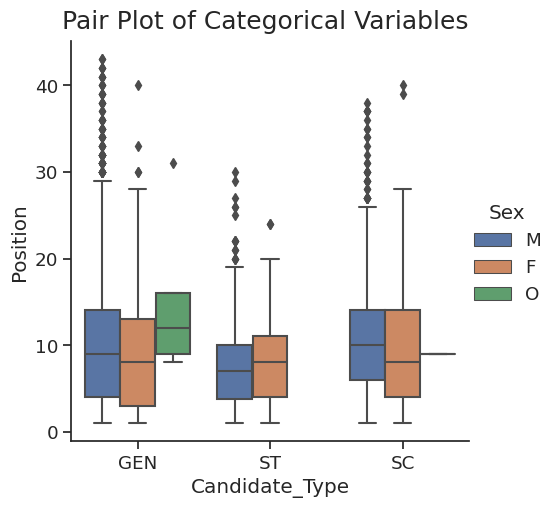

In [52]:
df_cur = df_2014[df_2014['Sex']!='NOTA']
sns.set(style='ticks', font_scale=1.2)
sns.catplot(x='Candidate_Type', y='Position', hue = 'Sex', kind='box', data=df_cur)
# g.set_axis_labels('Sex', 'Count')
plt.suptitle('Pair Plot of Categorical Variables', y=1.02, fontsize=18)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

84.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categor

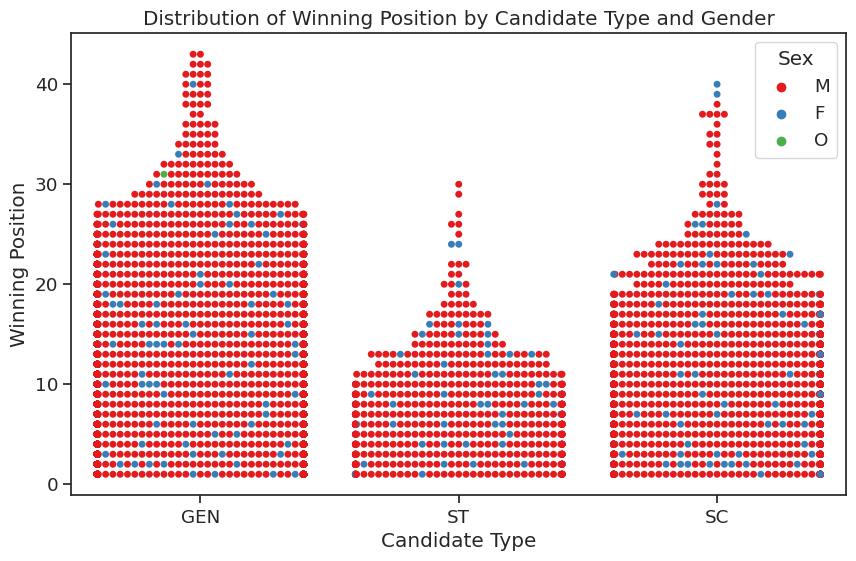

In [53]:
sns.set(style='ticks', font_scale=1.2)

# Create the swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Candidate_Type', y='Position', hue='Sex', data=df_cur, palette='Set1')

# Set the labels and title
plt.xlabel('Candidate Type')
plt.ylabel('Winning Position')
plt.title('Distribution of Winning Position by Candidate Type and Gender')

# Show the plot
plt.show()


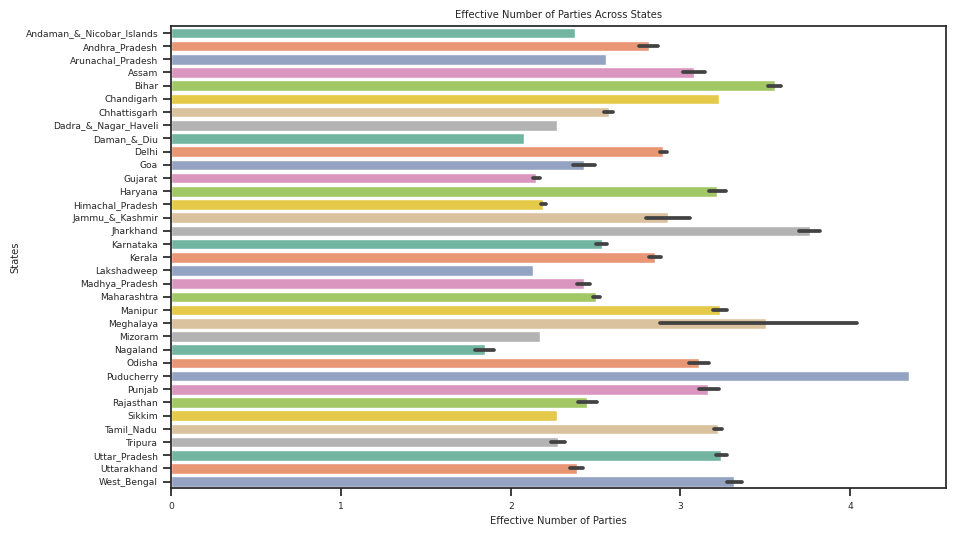

In [54]:
sns.set(style='ticks', font_scale=0.6)

plt.figure(figsize=(10, 6))
sns.barplot(x='ENOP', y='State_Name', data=df_2014, palette='Set2')

plt.xlabel('Effective Number of Parties')
plt.ylabel('States')
plt.title('Effective Number of Parties Across States')

plt.show()

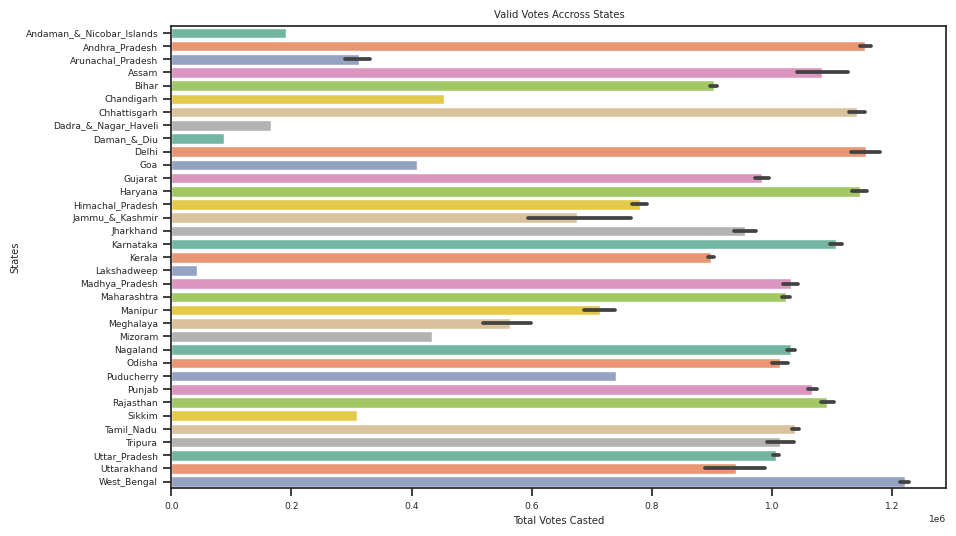

In [55]:
sns.set(style='ticks', font_scale=0.6)

plt.figure(figsize=(10, 6))
sns.barplot(x='Valid_Votes', y='State_Name', data=df_2014, palette='Set2')

plt.xlabel('Total Votes Casted')
plt.ylabel('States')
plt.title('Valid Votes Accross States')

plt.show()

In [56]:
topParties = df_2014['Party'].value_counts().head(20).index
topParties = topParties.drop('IND')
topParties = topParties.drop('NOTA')
topParties

Index(['BSP', 'INC', 'BJP', 'AAAP', 'BMUP', 'SP', 'AITC', 'CPM', 'JD(U)',
       'CPI(ML)(L)', 'SUCI', 'CPI', 'SHS', 'PECP', 'CPIM', 'RPI(A)', 'ADMK',
       'AIFB'],
      dtype='object')

In [57]:
df_top_parties = df_2014[df_2014['Party'].isin(topParties)]

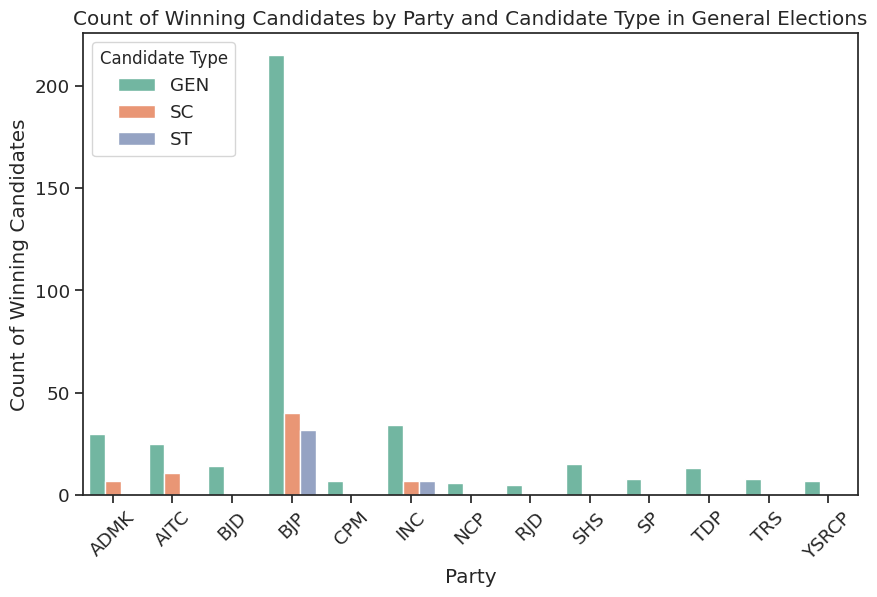

In [58]:
# Filter the DataFrame to include only candidates who won (Position 1)
df_winners = df_2014[df_2014['Position'] == 1]

# Get the count of candidates from each party who secured the first position, differentiated by Candidate_Type
winners_count = df_winners.groupby(['Party', 'Candidate_Type']).size().reset_index(name='Count')

# Set the style and font scale for the plot
sns.set(style='ticks', font_scale=1.2)

# Filter out parties with low counts (e.g., less than 5)
min_count_threshold = 5
winners_count_filtered = winners_count[winners_count['Count'] >= min_count_threshold]

# Create the bar plot to show count of winning candidates from each party, differentiated by Candidate_Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Count', hue='Candidate_Type', data=winners_count_filtered, palette='Set2')

# Set the labels and title
plt.xlabel('Party')
plt.ylabel('Count of Winning Candidates')
plt.title('Count of Winning Candidates by Party and Candidate Type in General Elections')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Candidate Type', title_fontsize='12')
plt.show()


In [59]:
# Filter the DataFrame to include only candidates who won (Position 1)
df_winners = df_2014[df_2014['Position'] == 1]

# Get the count of candidates from each party who secured the first position, differentiated by Candidate_Type
winners_count = df_winners.groupby(['Sex', 'Candidate_Type']).size().reset_index(name='Count')
winners_count


,Sex,Candidate_Type,Count
0,F,GEN,47
1,F,SC,13
2,F,ST,6
3,M,GEN,383
4,M,SC,74
5,M,ST,49


<ipython-input-60-2b952cd6bea9>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




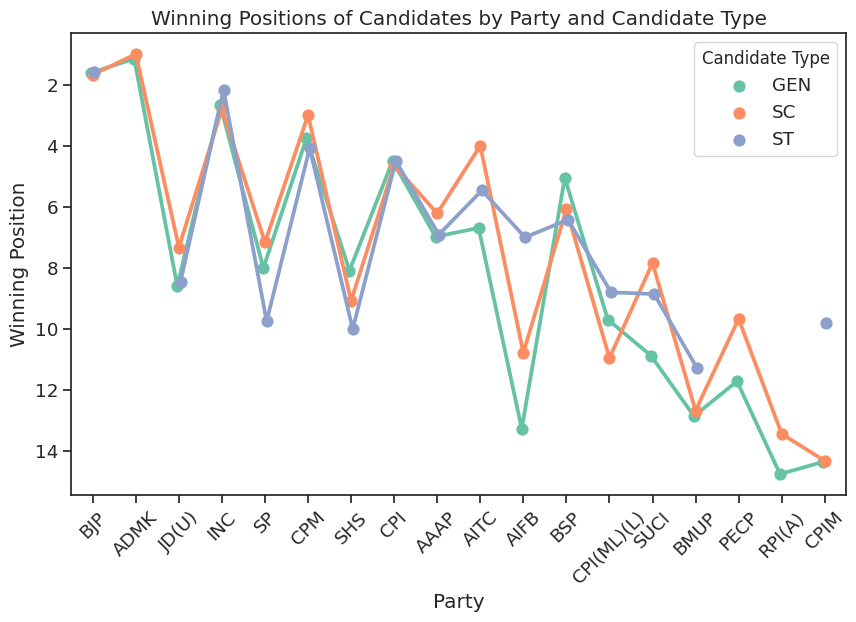

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the DataFrame df_top_parties as obtained in the previous steps

# Sort the DataFrame by winning positions (ascending order)
df_top_parties_sorted = df_top_parties.sort_values(by='Position', ascending=True)

# Set the style and font scale for the plot
sns.set(style='ticks', font_scale=1.2)

# Create the point plot with 'Candidate_Type' differentiated by colors
plt.figure(figsize=(10, 6))
sns.pointplot(x='Party', y='Position', hue='Candidate_Type', data=df_top_parties_sorted, palette='Set2', dodge=True, ci=None)

# Set the labels and title
plt.xlabel('Party')
plt.ylabel('Winning Position')
plt.title('Winning Positions of Candidates by Party and Candidate Type')

# Invert the y-axis to have position 1 higher and higher positions closer to the origin
plt.gca().invert_yaxis()

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Candidate Type', title_fontsize='12')
plt.show()
